In [184]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import rollingAnalysis

sales = pandas.read_csv("sales.csv").drop('Unnamed: 0', axis = 1)
daily_sales = pandas.read_csv("daily_sales.csv")

daily_sales.index = daily_sales["Unnamed: 0"].tolist()
daily_sales = daily_sales.drop('Unnamed: 0', axis = 1)

#convert ingredients to lists
sales["pizza_ingredients"] = sales["pizza_ingredients"].apply(lambda ingredients: ingredients.split(", "))



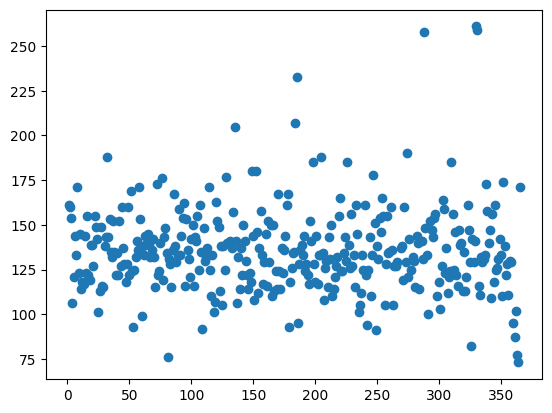

In [185]:
pyplot.scatter(x = daily_sales.index, y = daily_sales["item_count"])

In [186]:
daily_sales.loc[305]

item_count           123
date          2015-11-01
weekday           Sunday
Name: 305, dtype: object

([<matplotlib.axis.XTick at 0x171c1b6f380>,
 [Text(0, 0, 'January'),
  Text(60, 0, 'March'),
  Text(121, 0, 'May'),
  Text(182, 0, 'July'),
  Text(244, 0, 'Sept.'),
  Text(305, 0, 'Nov.')])

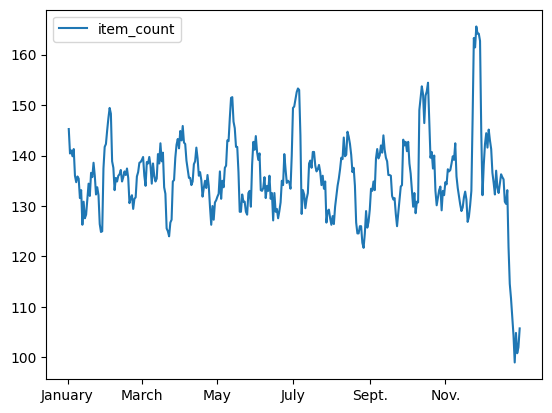

In [187]:
#let's take a look at the items sold per day as a rolling average
# choosing 3 here gives us exactly a 7 day rolling average
rollingAnalysis.plotRollingData(
    ["item_count"], daily_sales,
    3, direction="center"
)
pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
# there's a big drop in december

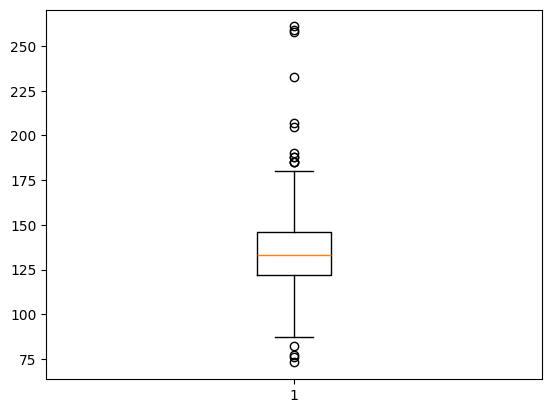

In [188]:
#let's find some outliers
pyplot.boxplot(x = daily_sales["item_count"])

#this looks exceptionally normal/symmetrical around the inner 90% of values
#proceed to find outliers via 2IQR method 
q_25 = daily_sales["item_count"].quantile(0.25)
q_75 = daily_sales["item_count"].quantile(0.75)

iqr = q_75 - q_25
q_50 = daily_sales["item_count"].quantile(0.5)

high_days = daily_sales[daily_sales["item_count"] > q_50 + 1.5*iqr]
low_days = daily_sales[daily_sales["item_count"] < q_50 - 1.5*iqr]

In [189]:
low_days
# nearly all the lowest days are on sundays
# the lowest days near the end of the year are right after christmas.
# people do not order much pizza around that time apparently (notice the graph)

,item_count,date,weekday
53,93,2015-02-22,Sunday
81,76,2015-03-22,Sunday
109,92,2015-04-19,Sunday
179,93,2015-06-28,Sunday
186,95,2015-07-05,Sunday
242,94,2015-08-30,Sunday
249,91,2015-09-06,Sunday
326,82,2015-11-22,Sunday
360,95,2015-12-26,Saturday
361,87,2015-12-27,Sunday


In [190]:
high_days
# nearly all the highest days are on Thursday or Friday
# sunday the 1st of february has...no good explanation as far as i can tell
# friday may 15th is "peace officers memorial day"
# perhaps there was a place who ordered pizza for a large group celebrating this holiday?
# 
#
# 4th of july and 3rd of july had major spikes
# thanksgiving has a noticeable spike
# some very specific holidays have notable spikes as well

,item_count,date,weekday
8,171,2015-01-08,Thursday
32,188,2015-02-01,Sunday
58,171,2015-02-27,Friday
72,173,2015-03-13,Friday
76,176,2015-03-17,Tuesday
114,171,2015-04-24,Friday
128,177,2015-05-08,Friday
135,205,2015-05-15,Friday
149,180,2015-05-29,Friday
152,180,2015-06-01,Monday


In [191]:
# analysis tells us certain weekdays are more popular than others